# **** Author : ABHIGYAN SHARMA ****


# ***HRC_ID : HRC61805WK***

# " PROJECT - Payment Date Prediction "


### Importing related Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime as dt
import warnings
warnings.filterwarnings("ignore")

### Store the dataset into the Dataframe


In [2]:
hrc_data=pd.read_csv('dataset.csv')
hrc_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


In [3]:
hrc_data.due_in_date[0]

20200210.0

### Check the shape of the dataframe


In [4]:
hrc_data.shape

(50000, 19)

### Check the Detail information of the dataframe

In [5]:
hrc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [6]:
hrc_data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [7]:
hrc_data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [8]:
hrc_data.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [9]:
hrc_data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [10]:
hrc_data[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [11]:
hrc_data[['baseline_create_date',"document_create_date",'document_create_date.1']]

,baseline_create_date,document_create_date,document_create_date.1
0,20200126.0,20200125,20200126
1,20190722.0,20190722,20190722
2,20190914.0,20190914,20190914
3,20200331.0,20200330,20200330
4,20191113.0,20191113,20191113
...,...,...,...
49995,20200421.0,20200417,20200421
49996,20190815.0,20190814,20190815
49997,20200219.0,20200218,20200219
49998,20191127.0,20191126,20191127


#### Please check, Column 'posting_id' is constant columns or not


In [12]:
hrc_data.posting_id.nunique()
# this shows that only one unique values
# We can use HeatMap to show that whether this has constant column or not
# sns.heatmap(hrc_data.posting_id,yticklabels="false",cmap="viridis")

1

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [13]:
hrc_data.isOpen.nunique()
# This is not constant column but its not also a revelant column for this project as we wont be using this till we get the Clear date i.e our target variable

2

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [14]:
### Write the code to drop all the following columns from the dataframe
# Checking Columns Before 
hrc_data.columns
hrc_data.drop(['area_business','posting_id','invoice_id','document_create_date','isOpen','document type','document_create_date.1'],axis=1,inplace=True)


### Please check from the dataframe whether all the columns are removed or not 

In [15]:
# Checking Columns After Removal
hrc_data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [16]:
hrc_data.loc[hrc_data.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Duplicate Rows

In [17]:
hrc_data.duplicated().sum()
# This shows the no of duplicate Rows 

1161

### Drop all the Duplicate Rows

In [18]:
hrc_data.drop_duplicates(inplace=True)

# Now check for shape
hrc_data.shape

(48839, 12)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [19]:
hrc_data.duplicated().sum()

# here the zero shows that the no of duplicated rows have been removed

0

### Check for the number of Rows and Columns in your dataset

In [20]:
hrc_data.shape

# No of rows have been reduced as the duplicated row have been removed
# Columns we have already dropped which we won't be considering while training

(48839, 12)

### Find out the total count of null values in each columns

In [21]:
hrc_data.isnull().sum()

# this shows that in clear date we are having the 9681 rows that are NULL
# and basically this is our target cloumn whihc we after splliting be considering as y_test to check the accuracy .

# We won't be removing or imputing the clear_date as this is our target variable  

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [22]:
hrc_data.dtypes
# Object data type given is basically the String Values,Numberical data ,continous data

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [23]:
hrc_data.dtypes[['clear_date','posting_date','due_in_date','baseline_create_date']]

clear_date               object
posting_date             object
due_in_date             float64
baseline_create_date    float64
dtype: object

### converting date columns into date time formats



- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [24]:
hrc_data['clear_date']= pd.to_datetime(hrc_data['clear_date'])
hrc_data['posting_date']= pd.to_datetime(hrc_data['posting_date'])
hrc_data['due_in_date']= pd.to_datetime(hrc_data['due_in_date'],format='%Y%m%d' )
hrc_data['baseline_create_date']= pd.to_datetime(hrc_data['baseline_create_date'],format='%Y%m%d')

hrc_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4


### Please check the datatype of all the columns after conversion of the above 4 columns

In [25]:
hrc_data.dtypes[['clear_date','posting_date','due_in_date','baseline_create_date']]


clear_date              datetime64[ns]
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [26]:
hrc_data['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [27]:
hrc_data.total_open_amount

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 48839, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [28]:
# hrc_data.replace({'USD':1,'CAD':0.7})
hrc_data['converted_usd']=hrc_data.loc[hrc_data.invoice_currency == 'CAD', 'total_open_amount'] = hrc_data.total_open_amount*0.79
# Aisa h kya ki totalopen_amount/usd price of one where curr=='usd' else if curr='cad' then total_amount/(cad/0.7)

### Display the new "converted_usd" column values

In [29]:
hrc_data['converted_usd']

0        42875.8912
1        62928.7140
2         1780.5494
3         2606.7630
4        26175.2991
            ...    
49995     2518.4094
49996     5345.5666
49997     4835.4794
49998       50.1492
49999     1414.3370
Name: converted_usd, Length: 48839, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [30]:
hrc_data['buisness_year'].value_counts()
# Reference -https://www.geeksforgeeks.org/python-pandas-index-value_counts/#:~:text=value_counts()%20function%20returns%20object,Excludes%20NA%20values%20by%20default.
#Whenever we want to split column values categorically then we use value_counts()

2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [31]:
hrc_data.drop(['invoice_currency','total_open_amount'],axis=1,inplace=True)

### Write a code to check the number of columns in dataframe

In [32]:
remaining_cols=hrc_data.shape[1]

print('Two columns have been removed and remaining columns are -',remaining_cols)

Two columns have been removed and remaining columns are - 11


# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [33]:
hrc_data.isna()
# through isna we get the 2d matrix of boolean values we implies that if for a particular cell we get the true that means it contains the null values 
# and if we get false that means we have no NAN values in that cell 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,True,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False,False


#### Find out the number of null values from the column that you got from the above code

In [34]:
hrc_data.isnull().sum()
# Through sum we Accumulate the amount of Rows that are containing NAN values in a particular columns
# We came to know that the Clear Business contains only NULL values values in our data set that too we have to predict 

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
baseline_create_date       0
cust_payment_terms         0
converted_usd              0
dtype: int64

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [35]:
main_data=hrc_data[hrc_data['clear_date'].isna()==False]
null_data=hrc_data[hrc_data['clear_date'].isna()==True]



In [36]:
hrc_data[ hrc_data['clear_date'].isna()==True]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2606.7630
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,8826.6858
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,2785.2161
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,95673.4635
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,2943.5874
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,10360.8421
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,7030.7709
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3923.9774
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1578.9256


### Check the number of Rows and Columns for both the dataframes 

In [37]:
print('Shape of main_data i.e Training dataframe',main_data.shape)
print('No of Rows in  main_data i.e Training dataframe = ',main_data.shape[0])
print('No of Columns in  main_data i.e Training dataframe = ',main_data.shape[1])



Shape of main_data i.e Training dataframe (39158, 11)
No of Rows in  main_data i.e Training dataframe =  39158
No of Columns in  main_data i.e Training dataframe =  11


In [38]:
print('Shape of null_data i.e Testing dataframe',null_data.shape)
print('No of Rows in  null_data  i.e Testing dataframe',null_data.shape[0])
print('No of Columns in  null_data  i.e Testing dataframe',1)



Shape of null_data i.e Testing dataframe (9681, 11)
No of Rows in  null_data  i.e Testing dataframe 9681
No of Columns in  null_data  i.e Testing dataframe 1


### Display the 5 records from maindata and nulldata dataframes

In [39]:
main_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,42875.8912
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,62928.7140
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,1780.5494
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,26175.2991
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,17558.4136


In [40]:
null_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2606.7630
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,8826.6858
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,2785.2161
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,95673.4635
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,2943.5874


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [41]:
main_data['Delay']=main_data['clear_date']-main_data['due_in_date']
# lets print this delay column
main_data['Delay']=main_data['Delay'].dt.days
main_data['Delay'].astype(int)
main_data['Delay']
# dt.days - gives no of element for each day

0         1
1        -3
2        92
4        -3
5        61
         ..
49994     0
49996     4
49997     0
49998     0
49999    -9
Name: Delay, Length: 39158, dtype: int64

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [42]:
avg_delay=main_data.groupby(['name_customer'])['Delay'].mean(numeric_only=False)
# sns.heatmap(hrc_data.avg_delay.isnull(),yticklabels='false',cmap='viridis')

# Example-
# df.groupby(['Animal']).mean()
#         Max Speed
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html  

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [43]:
main_data['avg_delay']=main_data['name_customer'].map(avg_delay)

main_data['avg_delay']
# We have mappped the avg_delay which we have calculated in variable (avg_delay) and have mapped it with customer name correpondingly!

# # MAP FUNCTION ?How to use 
# mylist=[x for x in range(1,100) ]
# print(mylist)

# def changelist(x):
#   return x*5

# newlist=list(map(changelist,mylist))
# print(newlist)

0        -2.702202
1        19.000000
2         8.090909
4        -2.185096
5        71.444444
           ...    
49994    -0.385417
49996    -2.472123
49997     1.047619
49998     1.567164
49999    -3.902174
Name: avg_delay, Length: 39158, dtype: float64

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [44]:
round(main_data.avg_delay*86400)

0        -233470.0
1        1641600.0
2         699055.0
4        -188792.0
5        6172800.0
           ...    
49994     -33300.0
49996    -213591.0
49997      90514.0
49998     135403.0
49999    -337148.0
Name: avg_delay, Length: 39158, dtype: float64

### Display the maindata dataframe 

In [45]:
main_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,42875.8912,1,-2.702202
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,62928.7140,-3,19.000000
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,1780.5494,92,8.090909
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,26175.2991,-3,-2.185096
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,17558.4136,61,71.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,66976.5160,0,-0.385417
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,5345.5666,4,-2.472123
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,4835.4794,0,1.047619
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,50.1492,0,1.567164


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [46]:
main_data.drop(['Delay','clear_date'],axis=1,inplace=True)

# Now Let's check the main_data shape As we have removed two columns!
main_data.shape 
# Before this we had 13 columns 

(39158, 11)

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [47]:
# Lets check the column names we have before proceeding in the Data
main_data.columns

Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'posting_date', 'due_in_date', 'baseline_create_date',
       'cust_payment_terms', 'converted_usd', 'avg_delay'],
      dtype='object')

In [48]:
X=main_data.drop(['avg_delay'],axis=1,inplace=False)
X

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,42875.8912
1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,62928.7140
2,U001,0200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,1780.5494
4,U001,0200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,26175.2991
5,CA02,0140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,17558.4136
...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,66976.5160
49996,U001,0200769623,WAL-MAR co,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,5345.5666
49997,U001,0200772595,SAFEW associates,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,4835.4794
49998,U001,0200726979,BJ'S llc,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,50.1492


In [49]:
y=main_data['avg_delay']
y

0        -2.702202
1        19.000000
2         8.090909
4        -2.185096
5        71.444444
           ...    
49994    -0.385417
49996    -2.472123
49997     1.047619
49998     1.567164
49999    -3.902174
Name: avg_delay, Length: 39158, dtype: float64

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [50]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, y, test_size=0.40, random_state=42)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [51]:
print("No of Row's and Column in X_train = ",X_train.shape)
print("No of Row's and Column in X_loc_test = ",X_loc_test.shape)
print("No of Row's and Column in y_train = ",y_train.shape)
print("No of Row's and Column in y_loc_test = ",y_loc_test.shape)

X_train.columns

No of Row's and Column in X_train =  (23494, 10)
No of Row's and Column in X_loc_test =  (15664, 10)
No of Row's and Column in y_train =  (23494,)
No of Row's and Column in y_loc_test =  (15664,)


Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'posting_date', 'due_in_date', 'baseline_create_date',
       'cust_payment_terms', 'converted_usd'],
      dtype='object')

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [52]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test, y_loc_test, test_size=0.5, random_state=42)

### Please check for the number of rows and columns of all the 4 dataframes 

In [53]:
print("No of Row's and Column in X_val = ",X_val.shape)
print("No of Row's and Column in X_test = ",X_test.shape)
print("No of Row's and Column in y_val = ",y_val.shape)
print("No of Row's and Column in y_test = ",y_test.shape)

No of Row's and Column in X_val =  (7832, 10)
No of Row's and Column in X_test =  (7832, 10)
No of Row's and Column in y_val =  (7832,)
No of Row's and Column in y_test =  (7832,)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

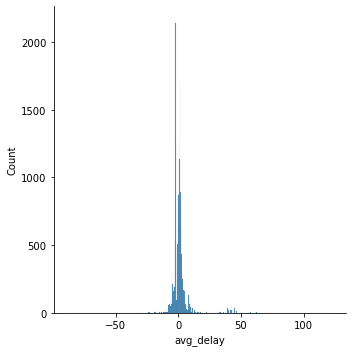

In [54]:
sns.displot(y_train)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [55]:
X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

,name_customer,doc_id
0,11078 us,1
1,17135 llc,1
2,99 CE,1
3,99 CE associates,1
4,99 CE co,1
...,...,...
3070,YEN BROS co,1
3071,YEN BROS corporation,2
3072,YEN BROS llc,1
3073,ZARCO co,1


### You can make another distribution plot of the "doc_id" column from x_train

<AxesSubplot:xlabel='doc_id'>

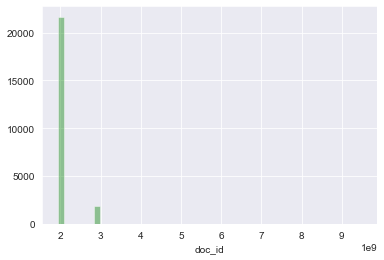

In [56]:
sns.set_style('darkgrid')
sns.distplot(X_train['doc_id'], kde = False, color ='green')

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


<AxesSubplot:xlabel='buisness_year'>

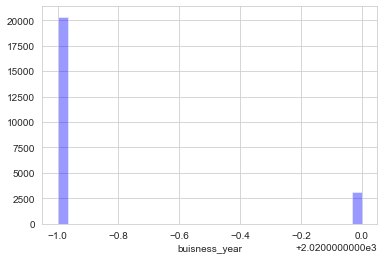

In [57]:
sns.set_style('whitegrid')
sns.distplot(X_train['buisness_year'], kde = False, color ='blue', bins = 30)

Text(0.5, 0, 'Business_year & doc_id')

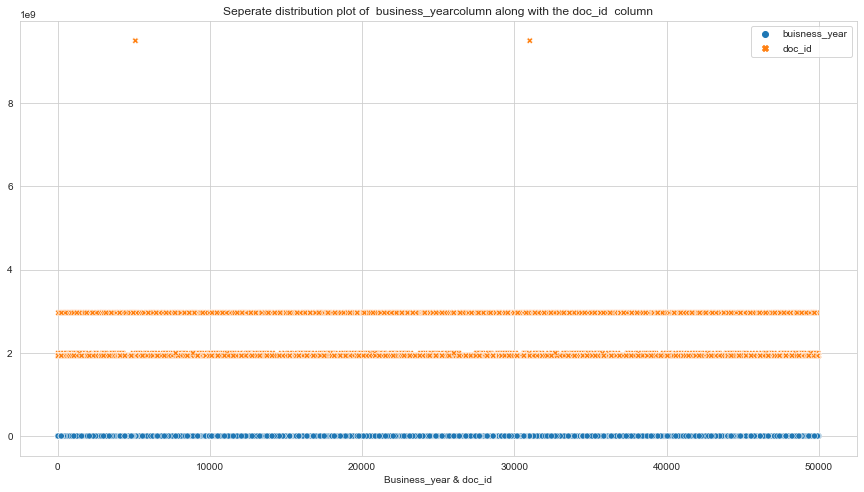

In [58]:
iris = X_train[['buisness_year','doc_id']]
# sns.displot(data=iris, kind='kde',fill='true', height=6.5, aspect=1.5)
plt.figure(figsize=(15,8))
sns.scatterplot(data=iris,legend='auto')

plt.title("Seperate distribution plot of  business_yearcolumn along with the doc_id  column")
plt.xlabel("Business_year & doc_id")

# https://seaborn.pydata.org/generated/seaborn.set_style.html
# https://www.python-graph-gallery.com/104-seaborn-themes
# Reference help from - https://stackoverflow.com/questions/62672699/how-to-set-x-axis-title-and-title-on-seaborn-distplot
# https://stackoverflow.com/questions/46045750/seaborn-distplot-displot-with-multiple-distribution

# Feature Engineering 

### Display and describe the X_train dataframe 

In [59]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
44556,U001,0200756072,REINHA corp,2019.0,1.929516e+09,2019-06-20,2019-07-05,2019-06-20,NAA8,42908.9290
36713,U001,0200776463,KROGE corp,2020.0,1.930432e+09,2020-01-23,2020-02-07,2020-01-23,NAA8,41653.4768
2639,U001,0200794332,COST systems,2019.0,1.928699e+09,2019-01-30,2019-02-14,2019-01-30,NAAX,16689.9113
49682,U001,0200780383,MEIJ foundation,2020.0,1.930341e+09,2019-12-31,2020-01-15,2019-12-31,NAA8,113483.2788
45201,U001,0200769623,WAL-MAR foundation,2019.0,1.929881e+09,2019-09-17,2019-10-02,2019-09-17,NAH4,11742.5600
...,...,...,...,...,...,...,...,...,...,...
7745,U013,0140103699,L&E IN,2019.0,1.991835e+09,2019-11-15,2019-12-15,2019-11-15,NAVE,15903.8534
14076,U001,0200900909,SYSCO co,2019.0,1.929117e+09,2019-04-12,2019-04-27,2019-04-12,NAA8,1867.2519
48693,U001,0200769623,WAL-MAR trust,2020.0,1.930413e+09,2020-01-20,2020-02-04,2020-01-20,NAH4,5264.3467
1054,U001,0200764795,SYSCO associates,2019.0,1.929948e+09,2019-10-03,2019-10-18,2019-10-03,NAA8,2377.9948


In [60]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.134077,2.011913e+09,25194.937850
std,0.340742,2.852458e+08,31085.500672
min,2019.000000,1.928502e+09,0.624100
25%,2019.000000,1.929174e+09,3730.796725
50%,2019.000000,1.929732e+09,13549.337400
75%,2019.000000,1.930209e+09,36786.478375
max,2020.000000,9.500000e+09,528188.754400


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [61]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit_transform(X_train['business_code'])

array([1, 1, 1, ..., 1, 1, 1])

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [62]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [63]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [64]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
44556,U001,1
36713,U001,1
2639,U001,1
49682,U001,1
45201,U001,1
...,...,...
7745,U013,5
14076,U001,1
48693,U001,1
1054,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [65]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [66]:
X_train ,X_val,X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [67]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [68]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [69]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [70]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [71]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [72]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [73]:
X_train.dtypes
# Alternative is you can use info()

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [74]:
X_test.dtypes
# Alternative is you can use info()

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [75]:
X_val.dtypes
# Alternative is you can use info()

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [76]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [77]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [78]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year



### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [79]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [80]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year



pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [81]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [82]:
X_train.dtypes
# Alternative is you can use info()

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [83]:
X_test.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [84]:
X_val.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [85]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])


# he variance threshold is a simple baseline approach to feature selection. 
# It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features,
# i.e., features that have the same value in all samples.10-Oct-2020

16

- Note - Keep the code as it is, no need to change 


In [86]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [87]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [88]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [89]:
train=X_train.copy()
handling_correlation(train.copy(),0.8)

['month_of_due',
 'year_of_createdate',
 'year_of_postingdate',
 'year_of_due',
 'day_of_createdate',
 'month_of_createdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

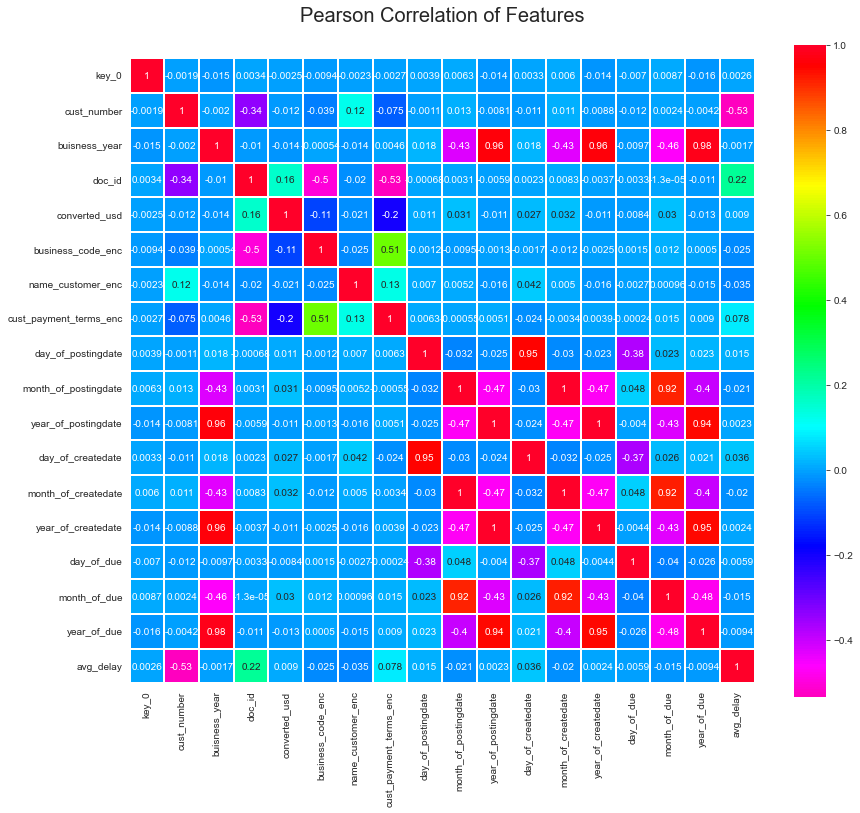

In [90]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [91]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [92]:
sel.variances_

array([1.73096954e+15, 1.16100201e-01, 8.13617218e+16, 9.66267222e+08,
       2.80596482e-01, 1.05187609e+06, 1.23314110e+02, 7.59077911e+01,
       1.23199874e+01, 1.16288980e-01, 7.75034812e+01, 1.23305592e+01,
       1.16501724e-01, 7.61464282e+01, 1.21259307e+01, 1.19305793e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [93]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [94]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)   #Fitting the train data  into our Model!
predicted= regressor.predict(X_test) #Passing the testing data into our model. 
# X-Test is passed as we while training our model we did a partioning of 60:40 and we thus have passed that 40% testing part in our model we trained.

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [95]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

print('MSE SCORE =',MSE_Score)
print('R2 SCORE =',R2_Score)

MSE SCORE = [42.88594553138902]
R2 SCORE = [0.3217972884129576]


### Check the same for the Validation set also 

In [96]:
MSE_Score_val = []
R2_Score_val = []
predict_test= regressor.predict(X_val)
MSE_Score_val.append(mean_squared_error(y_val, predict_test, squared=False))
R2_Score_val.append(r2_score(y_test, predicted))

print('MSE SCORE FOR VALIDATION SET =',MSE_Score_val)
print('R2 SCORE  FOR VALIDATION SET=',R2_Score_val)

MSE SCORE FOR VALIDATION SET = [5.971602801939788]
R2 SCORE  FOR VALIDATION SET= [0.3217972884129576]


### Display The Comparison Lists

In [97]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[42.88594553138902],[0.3217972884129576],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [98]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train, y_train)  #Fitting the train data  into our Model!
predicted=clf.predict(X_test) #Passing the testing data into our model. 
# X-Test is passed as we while training our model we did a partioning of 60:40 and we thus have passed that 40% testing part in our model we trained.

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [99]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

print('MSE SCORE =',MSE_Score)
print('R2 SCORE =',R2_Score)

MSE SCORE = [42.88594553138902, 52.77919695408018]
R2 SCORE = [0.3217972884129576, 0.16534440255153693]


### Check the same for the Validation set also 

In [100]:
MSE_Score_val = []
R2_Score_val = []
predict_test= clf.predict(X_val)
MSE_Score_val.append(mean_squared_error(y_val, predict_test, squared=False))
R2_Score_val.append(r2_score(y_test, predicted))

print('MSE SCORE FOR VALIDATION SET =',MSE_Score_val)
print('R2 SCORE  FOR VALIDATION SET=',R2_Score_val)

MSE SCORE FOR VALIDATION SET = [6.784514069886777]
R2 SCORE  FOR VALIDATION SET= [0.16534440255153693]


### Display The Comparison Lists

In [101]:
for i in Algorithm,MSE_Score,R2_Score:
    print(i,end=' ')

['LinearRegression', 'Support Vector Regression'] [42.88594553138902, 52.77919695408018] [0.3217972884129576, 0.16534440255153693] 

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [102]:

# Reference taken from GFG
# https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/
# import the regressor
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegressor')
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X_train, y_train)   #Fitting the train data  into our Model!
predicted= regressor.predict(X_test) #Passing the testing data into our model. 
# X-Test is passed as we while training our model we did a partioning of 60:40 and we thus have passed that 40% testing part in our model we trained.

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [103]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

print('MSE SCORE =',MSE_Score)
print('R2 SCORE =',R2_Score)

MSE SCORE = [42.88594553138902, 52.77919695408018, 30.937828950576957]
R2 SCORE = [0.3217972884129576, 0.16534440255153693, 0.5107460212217965]


### Check the same for the Validation set also 

In [104]:
MSE_Score_val.clear()
R2_Score_val.clear()
predict_test= clf.predict(X_val)
MSE_Score_val.append(mean_squared_error(y_val, predict_test, squared=False))
R2_Score_val.append(r2_score(y_test, predicted))

print('MSE SCORE FOR VALIDATION SET =',MSE_Score_val)
print('R2 SCORE  FOR VALIDATION SET=',R2_Score_val)

MSE SCORE FOR VALIDATION SET = [6.784514069886777]
R2 SCORE  FOR VALIDATION SET= [0.5107460212217965]


### Display The Comparison Lists

In [105]:
for i in Algorithm,MSE_Score,R2_Score:
    print(i,end=' ')

['LinearRegression', 'Support Vector Regression', 'DecisionTreeRegressor'] [42.88594553138902, 52.77919695408018, 30.937828950576957] [0.3217972884129576, 0.16534440255153693, 0.5107460212217965] 

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [106]:
# Reference : Documentation  and GFG
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# https://www.geeksforgeeks.org/random-forest-regression-in-python/
# Fitting Random Forest Regression to the dataset


# import the regressor
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
regressor.fit(X_train, y_train)   #Fitting the train data  into our Model!
predicted= regressor.predict(X_test) #Passing the testing data into our model. 
# X-Test is passed as we while training our model we did a partioning of 60:40 and we thus have passed that 40% testing part in our model we trained.

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [107]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

print('MSE SCORE =',MSE_Score)
print('R2 SCORE =',R2_Score)

MSE SCORE = [42.88594553138902, 52.77919695408018, 30.937828950576957, 14.85545517561359]
R2 SCORE = [0.3217972884129576, 0.16534440255153693, 0.5107460212217965, 0.7650743184713786]


### Check the same for the Validation set also 

In [108]:
MSE_Score_val.clear()
R2_Score_val.clear()
predict_test= clf.predict(X_val)
MSE_Score_val.append(mean_squared_error(y_val, predict_test, squared=False))
R2_Score_val.append(r2_score(y_test, predicted))

print('MSE SCORE FOR VALIDATION SET =',MSE_Score_val)
print('R2 SCORE  FOR VALIDATION SET=',R2_Score_val)

MSE SCORE FOR VALIDATION SET = [6.784514069886777]
R2 SCORE  FOR VALIDATION SET= [0.7650743184713786]


### Display The Comparison Lists


In [109]:
for i in Algorithm,MSE_Score,R2_Score:
    print(i,end=' ')

['LinearRegression', 'Support Vector Regression', 'DecisionTreeRegressor', 'Random Forest Regressor'] [42.88594553138902, 52.77919695408018, 30.937828950576957, 14.85545517561359] [0.3217972884129576, 0.16534440255153693, 0.5107460212217965, 0.7650743184713786] 

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [110]:
# Reference :- https://xgboost.readthedocs.io/en/stable/get_started.html
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)



#ModuleNotFoundError: No module named 'xgboost'
# error was solved through https://stackoverflow.com/questions/40747738/importerror-no-module-named-xgboost

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [111]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

print('MSE SCORE =',MSE_Score)
print('R2 SCORE =',R2_Score)

MSE SCORE = [42.88594553138902, 52.77919695408018, 30.937828950576957, 14.85545517561359, 13.237150315517251]
R2 SCORE = [0.3217972884129576, 0.16534440255153693, 0.5107460212217965, 0.7650743184713786, 0.7906663563917858]


### Check the same for the Validation set also 

In [112]:
MSE_Score_val.clear()
R2_Score_val.clear()
predict_test= clf.predict(X_val)
MSE_Score_val.append(mean_squared_error(y_val, predict_test, squared=False))
R2_Score_val.append(r2_score(y_test, predicted))

print('MSE SCORE FOR VALIDATION SET =',MSE_Score_val)
print('R2 SCORE  FOR VALIDATION SET=',R2_Score_val)

MSE SCORE FOR VALIDATION SET = [6.784514069886777]
R2 SCORE  FOR VALIDATION SET= [0.7906663563917858]


### Display The Comparison Lists


In [113]:
for i in Algorithm,MSE_Score,R2_Score:
    print(i,end=' ')
    
#Thus we can conclude that the Mean Sqaure Error is least for the XGBOOST Algorithmn as comparitively to other Algorithmns.

['LinearRegression', 'Support Vector Regression', 'DecisionTreeRegressor', 'Random Forest Regressor', 'XGB Regressor'] [42.88594553138902, 52.77919695408018, 30.937828950576957, 14.85545517561359, 13.237150315517251] [0.3217972884129576, 0.16534440255153693, 0.5107460212217965, 0.7650743184713786, 0.7906663563917858] 

## You need to make the comparison list into a comparison dataframe 

In [114]:
dict={'Algorithm':Algorithm,'MSE_Score':MSE_Score,'R2_Score':R2_Score}
algotable=pd.DataFrame(dict)
algotable

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,42.885946,0.321797
1,Support Vector Regression,52.779197,0.165344
2,DecisionTreeRegressor,30.937829,0.510746
3,Random Forest Regressor,14.855455,0.765074
4,XGB Regressor,13.237150,0.790666


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [115]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [116]:
print('Mean Square Error for test dataset = ',    mean_squared_error(y_test,predictedfinal,squared=False))

Mean Square Error for test dataset =  3.638289476597107


### Calculate the mean Square Error for validation dataset

In [117]:
print('Mean Square Error for validation dataset = ',  mean_squared_error(y_val,predict_testfinal,squared=False))

Mean Square Error for validation dataset =  3.7156810381526384


### Calculate the R2 score for test

In [118]:
print(' R2 score for test = ',r2_score(y_test,predictedfinal))

 R2 score for test =  0.7906663563917858


### Calculate the R2 score for Validation

In [119]:
print(' R2 score for validation = ',r2_score(y_val,predict_testfinal))

 R2 score for validation =  0.755560162911651


### Calculate the Accuracy for train Dataset 

In [120]:
print("accuracy for the train dataset : " , regressorfinal.score(X_train, y_train))

accuracy for the train dataset :  0.9528696900210712


### Calculate the accuracy for validation

In [121]:
print("accuracy for the validation dataset : " , regressorfinal.score(X_val, y_val))

accuracy for the validation dataset :  0.755560162911651


### Calculate the accuracy for test

In [122]:
print("accuracy for the test dataset : " , regressorfinal.score(X_test, y_test))

accuracy for the test dataset :  0.7906663563917858


## Specify the reason behind choosing your machine learning model 

- Answer : We have calculated the Mean Square Error and R Square error for all the given Algorithmns and thus we found that among all the listed algorithmns XGBOOST Regressor had the least MSE and highest R2_S ,hence prooving it to be the best suitable Algorithmn for our Model

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [123]:
null_data
# NULL_DATA contains all the rows which had clear_date =NaT which we have predict using our

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2606.7630
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,8826.6858
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,2785.2161
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,95673.4635
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,2943.5874
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,10360.8421
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,7030.7709
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3923.9774
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1578.9256


### Check for the number of rows and columns in the nulldata

In [124]:
print('No of Rows in the NULL DATA    = ',null_data.shape[0])
print('No of Columns in the NULL DATA = ',null_data.shape[1])


No of Rows in the NULL DATA    =  9681
No of Columns in the NULL DATA =  11


### Check the Description and Information of the nulldata 

In [125]:
null_data.describe()

,buisness_year,doc_id,converted_usd
count,9681.0,9.681000e+03,9681.000000
mean,2020.0,2.006165e+09,26365.429170
std,0.0,2.673629e+08,29867.342976
min,2020.0,1.930535e+09,0.568800
25%,2020.0,1.930658e+09,4555.045200
50%,2020.0,1.930731e+09,15248.572100
75%,2020.0,1.930818e+09,38802.074500
max,2020.0,2.960636e+09,516379.392000


In [126]:
null_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 non-null   float64       
 6   posting_date          9681 non-null   datetime64[ns]
 7   due_in_date           9681 non-null   datetime64[ns]
 8   baseline_create_date  9681 non-null   datetime64[ns]
 9   cust_payment_terms    9681 non-null   object        
 10  converted_usd         9681 non-null   float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 907.6+ KB


### Storing the Nulldata into a different dataset 
# for BACKUP

In [127]:
backup_null_data=null_data.copy(deep=True)
backup_null_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2606.7630
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,8826.6858
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,2785.2161
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,95673.4635
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,2943.5874
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,10360.8421
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,7030.7709
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3923.9774
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1578.9256


### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [128]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(null_data['business_code'])
null_data['business_code_enc'] = business_codern.transform(null_data['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [129]:
null_data['cust_number'] = null_data['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [130]:
null_data['day_of_cleardate'] = null_data['clear_date'].dt.day
null_data['month_of_cleardate'] = null_data['clear_date'].dt.month
null_data['year_of_cleardate'] = null_data['clear_date'].dt.year

null_data['day_of_postingdate'] = null_data['posting_date'].dt.day
null_data['month_of_postingdate'] = null_data['posting_date'].dt.month
null_data['year_of_postingdate'] = null_data['posting_date'].dt.year


null_data['day_of_due'] = null_data['due_in_date'].dt.day
null_data['month_of_due'] = null_data['due_in_date'].dt.month
null_data['year_of_due'] = null_data['due_in_date'].dt.year


null_data['day_of_createdate'] = null_data['baseline_create_date'].dt.day
null_data['month_of_createdate'] = null_data['baseline_create_date'].dt.month
null_data['year_of_createdate'] = null_data['baseline_create_date'].dt.year


### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [131]:
null_data['cust_payment_terms_enc']=label_encoder1.transform(null_data['cust_payment_terms'])
null_data['business_code_enc']=label_encoder1.transform(null_data['business_code'])
null_data['name_customer_enc']=label_encoder.transform(null_data['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [132]:
null_data.dtypes

business_code                     object
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int32
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

### Checking the no of columns after adding :-

In [133]:
null_data.shape[1]

26

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [134]:
null_data.drop(['business_code',"baseline_create_date","due_in_date","posting_date","name_customer",'clear_date','cust_payment_terms','day_of_cleardate','month_of_cleardate','year_of_cleardate'],axis=1,inplace=True)

### Check the information of the "nulldata" dataframe

In [135]:
null_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int32  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

In [136]:
null_data.isna().sum()

cust_number               0
buisness_year             0
doc_id                    0
converted_usd             0
business_code_enc         0
day_of_postingdate        0
month_of_postingdate      0
year_of_postingdate       0
day_of_due                0
month_of_due              0
year_of_due               0
day_of_createdate         0
month_of_createdate       0
year_of_createdate        0
cust_payment_terms_enc    0
name_customer_enc         0
dtype: int64

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [137]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 6118 to 44809
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             7832 non-null   int32  
 1   buisness_year           7832 non-null   float64
 2   doc_id                  7832 non-null   float64
 3   converted_usd           7832 non-null   float64
 4   business_code_enc       7832 non-null   int32  
 5   name_customer_enc       7832 non-null   int32  
 6   cust_payment_terms_enc  7832 non-null   int32  
 7   day_of_postingdate      7832 non-null   int64  
 8   month_of_postingdate    7832 non-null   int64  
 9   year_of_postingdate     7832 non-null   int64  
 10  day_of_createdate       7832 non-null   int64  
 11  month_of_createdate     7832 non-null   int64  
 12  year_of_createdate      7832 non-null   int64  
 13  day_of_due              7832 non-null   int64  
 14  month_of_due            7832 non-nul

In [138]:
X_test.isna().sum()

cust_number               0
buisness_year             0
doc_id                    0
converted_usd             0
business_code_enc         0
name_customer_enc         0
cust_payment_terms_enc    0
day_of_postingdate        0
month_of_postingdate      0
year_of_postingdate       0
day_of_createdate         0
month_of_createdate       0
year_of_createdate        0
day_of_due                0
month_of_due              0
year_of_due               0
dtype: int64

In [139]:
# For checking  the order
print(X_test.columns)
print()
print(null_data.columns)

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')


### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [140]:
print(X_test.columns)
print(X_test.shape[1])

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')
16


In [141]:
print(null_data.columns)
print(null_data.shape[1])

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')
16


In [142]:
nulldata2=null_data[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [143]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020.0,2.960623e+09,2606.7630,65,2694,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020.0,1.930659e+09,8826.6858,65,2777,21,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020.0,1.930611e+09,2785.2161,65,96,21,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020.0,1.930788e+09,95673.4635,65,2008,21,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020.0,1.930817e+09,2943.5874,65,729,36,23,4,2020,16,4,2020,26,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,200769623,2020.0,1.930625e+09,10360.8421,65,2979,34,10,3,2020,10,3,2020,25,3,2020
49980,200769623,2020.0,1.930851e+09,7030.7709,65,2977,34,3,5,2020,3,5,2020,18,5,2020
49982,200148860,2020.0,1.930638e+09,3923.9774,65,803,21,11,3,2020,11,3,2020,26,3,2020
49992,200900909,2020.0,1.930702e+09,1578.9256,65,2738,21,25,3,2020,25,3,2020,9,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [144]:
final_result=regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [145]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [146]:
final_result

0       17.415678
1       13.107922
2        0.350544
3        5.004538
4       -0.293385
          ...    
9676     6.176374
9677     6.804886
9678    -2.440546
9679     3.396256
9680     2.573840
Name: avg_delay, Length: 9681, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [147]:
backup_null_data.reset_index(drop=True,inplace=True)
Final = backup_null_data.merge(final_result , on = null_data.index )

### Display the "Final" dataframe 

In [148]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2606.7630,17.415678
1,7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,8826.6858,13.107922
2,10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,2785.2161,0.350544
3,14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,95673.4635,5.004538
4,15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,2943.5874,-0.293385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,10360.8421,6.176374
9677,49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,7030.7709,6.804886
9678,49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3923.9774,-2.440546
9679,49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1578.9256,3.396256


In [149]:
Final['avg_delay']=Final['avg_delay'].astype(int) 

In [150]:
Final
# Rechecking the Final Dataframe as we have converted the datatype of avg_delay to int from float,as we only want delay i.e is in numbers

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2606.7630,17
1,7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,8826.6858,13
2,10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,2785.2161,0
3,14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,95673.4635,5
4,15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,2943.5874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,10360.8421,6
9677,49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,7030.7709,6
9678,49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3923.9774,-2
9679,49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1578.9256,3


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [151]:
print('Number of Rows in Final DataFrame',Final.shape[0])
print('Number of Columns in Final DataFrame',Final.shape[1])


Number of Rows in Final DataFrame 9681
Number of Columns in Final DataFrame 13


### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [152]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='D')

### Display the "clear_date" column

In [153]:
Final['clear_date']

0      2020-04-27
1      2020-04-16
2      2020-03-26
3      2020-05-05
4      2020-04-26
          ...    
9676   2020-03-31
9677   2020-05-24
9678   2020-03-24
9679   2020-04-12
9680   2020-05-08
Name: clear_date, Length: 9681, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [154]:
Final['avg_delay']  
# We haven't converted it into days here by dividing it with 86400i.e 1 day=86400 seconds as in the above cells i have used the unit as
# unit='D'  i.e i have already took day from the clear_date
# Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='D')

0       17
1       13
2        0
3        5
4        0
        ..
9676     6
9677     6
9678    -2
9679     3
9680     2
Name: avg_delay, Length: 9681, dtype: int32

### Display the "avg_delay" column 

In [155]:
Final['avg_delay']

0       17
1       13
2        0
3        5
4        0
        ..
9676     6
9677     6
9678    -2
9679     3
9680     2
Name: avg_delay, Length: 9681, dtype: int32

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [156]:
bins= [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [157]:
Final.drop(['key_0','avg_delay'],axis=1,inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [158]:
Final['Aging Bucket'].value_counts()
# Value_counts is used to calculate the count of each Category and their respective counts

0-15               8726
16-30               406
31-45                62
Greatar than 60       5
46-60                 4
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [159]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,0140105686,SYSC llc,2020-04-27,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2606.7630,16-30
1,U001,0200744019,TARG us,2020-04-16,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,8826.6858,0-15
2,U001,0200418007,AM,2020-03-26,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,2785.2161,0-15
3,U001,0200739534,OK systems,2020-05-05,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,95673.4635,0-15
4,U001,0200353024,DECA corporation,2020-04-26,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,2943.5874,0-15
...,...,...,...,...,...,...,...,...,...,...,...,...
9676,U001,0200769623,WAL-MAR in,2020-03-31,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,10360.8421,0-15
9677,U001,0200769623,WAL-MAR corporation,2020-05-24,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,7030.7709,0-15
9678,U001,0200148860,DOLLA co,2020-03-24,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3923.9774,NaN
9679,U001,0200900909,SYSCO co,2020-04-12,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1578.9256,0-15


### Store this dataframe into the .csv forma

In [160]:
# saving the dataframe
Final.to_csv('HRC61805WK_ABHIGYAN_SHARMA.csv')

# END OF THE PROJECT